**1. Setup and Laod Data**

In [87]:
!pip install tensorflow

In [88]:
import tensorflow as tf
import os

**2. Preprocessing - Remove doggy images**

In [89]:
data_dir='data'
img_exts=['jpeg', 'jpg', 'bmp', 'png']

In [90]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [91]:
for image_calss in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_calss)):
    image_path=os.path.join(data_dir, image_calss, image)
    try:
      img=cv2.imread(image_path)
      tip=imghdr.what(image_path)
      if tip not in img_exts:
        print("image not found in ext list {}".format(image_path))
        os.remove(image_path)
    except Exception as e:
      print("Issue with image {}".format(image_path))

**Load the Data**

In [92]:
import numpy as np
data=tf.keras.utils.image_dataset_from_directory('data')   #Makes some changes to the data for better loading

Found 179 files belonging to 2 classes.


In [93]:
data_iterator=data.as_numpy_iterator()
batch=data_iterator.next()

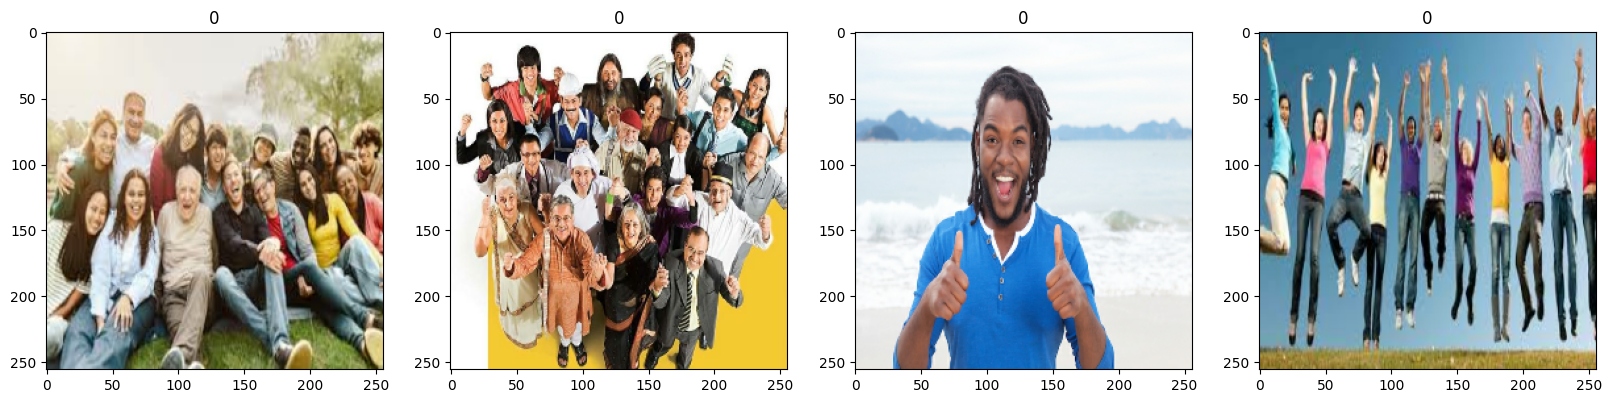

In [94]:
#Sad=1, happy=0
fig, ax=plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

**Preprocessing the data**

In [95]:
#Scale data - decreasing the data for better optimizing the model (data.min=0, data.max=255)
data=data.map(lambda x,y: (x/255, y))

In [96]:
len(data)

6

In [97]:
#Split the data
train_size=int(len(data)*0.6)
val_size=int(len(data)*0.3)+1
test_size=int(len(data)*0.1)+1

In [98]:
train=data.take(train_size)
print(len(train))
val=data.skip(train_size).take(val_size)
print(len(val))
test=data.skip(train_size + val_size).take(test_size)
print(len(test))

3
2
1


**Deep Learning Model**

In [99]:
#build the neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [100]:
model=Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3))) #16=number of filters, 3,3=size of the filters, 1=stride
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [101]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy']) #adam=optimizer

In [102]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [103]:
#train model
logdir='logs'
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist=model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5924 - loss: 1.0777 - val_accuracy: 0.3750 - val_loss: 0.8672
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.4492 - loss: 0.9223 - val_accuracy: 0.4844 - val_loss: 0.6883
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.6549 - loss: 0.6486 - val_accuracy: 0.5000 - val_loss: 0.6752
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 963ms/step - accuracy: 0.6471 - loss: 0.6008 - val_accuracy: 0.7344 - val_loss: 0.5007
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.6146 - loss: 0.6173 - val_accuracy: 0.6719 - val_loss: 0.5422
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 766ms/step - accuracy: 0.6745 - loss: 0.5574 - val_accuracy: 0.7188 - val_loss: 0.5464
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 885ms/step - accuracy: 0.7383 - loss: 0.4997 - val_accuracy: 0.8281 - val_loss: 0.4126
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 978ms/step - accuracy: 0.8646 - loss: 0.4380 - val_accuracy: 0.8281 - val_loss: 0.4013
Epoc

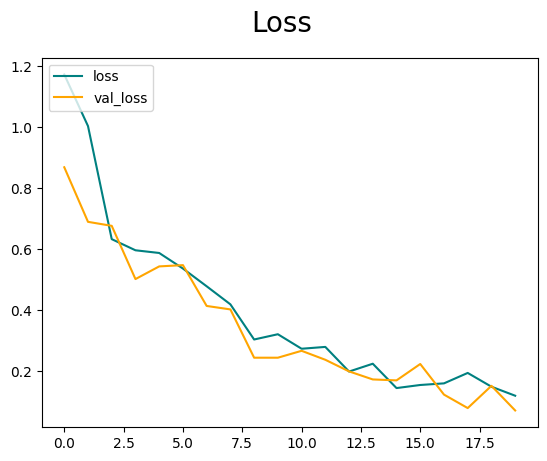

In [104]:
#plot performance
fig=plt.figure()
plt.plot(hist.history['loss'], color='teal', label=['loss'])
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
plt.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

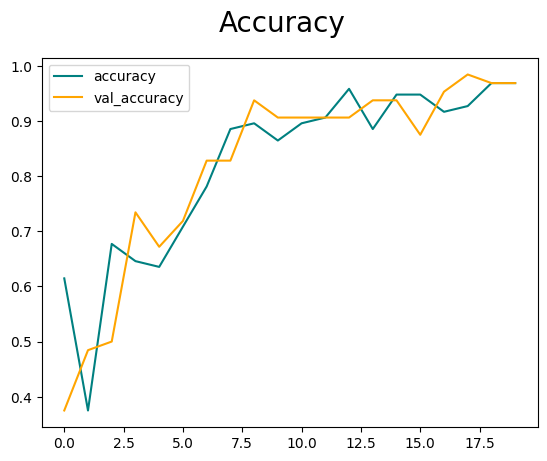

In [105]:
fig=plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label=['accuracy'])
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
plt.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

**Evaluation Performance**

In [106]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [107]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [108]:
for batch in test.as_numpy_iterator():
  X, y= batch
  yhat=model.predict(X)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


In [109]:
print(f"Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}")

Precision:1.0, Recall:1.0, Accuracy:1.0


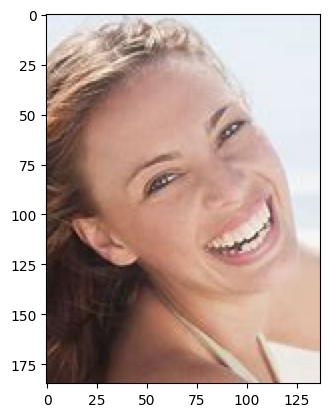

In [111]:
img=cv2.imread('happytest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

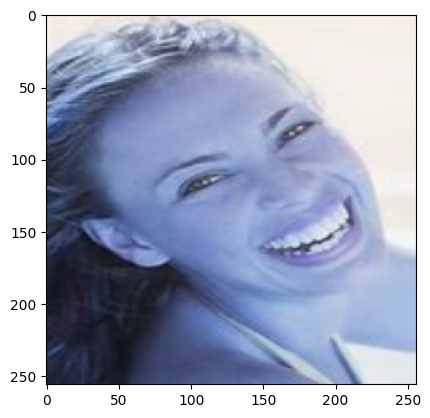

In [112]:
resize=tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [113]:
yhat=model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 679ms/step


In [114]:
yhat

array([[0.58323514]], dtype=float32)

In [115]:
if yhat > 0.5:
  print(f'Predicted is hapyy')
else:
  print(f'Prediccted is sad')

Predicted is hapyy


**Save the Model**

In [116]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models','happysadmodel.h5'))